# Instalar dependencias

In [1]:
%pip install sklearn

# Regresión Logística


# Cómo importar las librerías


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [3]:
dataset = pd.read_csv('./Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Ajustar el modelo de Regresión Logística en el Conjunto de Entrenamiento

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predicción de los resultados con el Conjunto de Testing


In [8]:
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

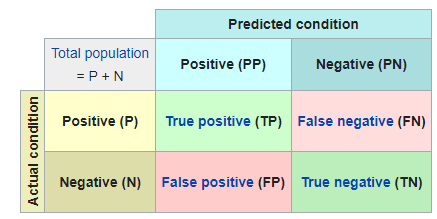

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

In [11]:
from matplotlib.colors import ListedColormap

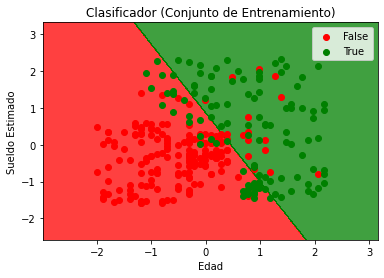

In [55]:
X_set, y_set = X_train, y_train
# Generamos una maya de coordenadas para pintar, utilizando la función meshgrid y arange de numpy.
# La matriz X1 va desde el mínimo de la edad (normalizada o escalada) al máximo, aumentando de 0.01 en 0.01 por columnas.
# La matrix X2 va desde el mínimo del salario al máxim0, aumentando de 0.01 en 0.01 por filas y columnas.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

inspect_var = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape).reshape(X1.shape)

# Con contourf dividimos la maya en dos secciones y pintamos la recta de regresión que las pinta, le tenemos que pasar la maya y la variable Z, que serán las predicciones hechas por el algoritmo de regresión.
#   - La función ravel de numpy aplana una matriz en un vector.
#   - La función array nos permite construir una matriz. Estamos construyendo un array de dos filas y n columnas, siendo n la longitud de la maya anterior aplanada
#   - Con el operador T transponemos y construimos una matriz de n filas y dos columnas, lista para elaborar la predicción
#   - Utilizamos el clasificador para realizar la predicción. Tendremos un vector con n filas (1 columna)
#   - Mediante reshape convertimos el vector de nuevo a una matriz, pero con las dimensiones de la maya
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Establecemos los límites del plot
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Pintamos los puntos:
#   - np.unique(y_set) es un array con dos valores, [0,1]
#   - The enumerate object yields pairs containing a count (from start, which defaults to zero) and a value yielded by the iterable argument
#   - Con X_set[y_set == j, 0] cuando j vale 0 tendremos todos los valores de edades (la columna es la 0) que se han clasificado como False (recordemos que False es 0). De manera equivalente tendremos los valores de edades clasificados como True cuando j vale 1.
#   - Con X_set[y_set == j, 1] cuando j vale 0 tendremos todos los valores de salarios que se han clasificado como False. De manera equivalente tendremos los valores de salarios clasificados como True cuando j vale 1.
#   - ListedColormap(('red', 'green'))(i) => Cuando i vale 0 pintaremos los puntos de rojo y cuando vale 1 de verde
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = ["False", "True"][i])

# Finalmente mostramos etiquetas en los títulos, ejes y mostramos el gráfico
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

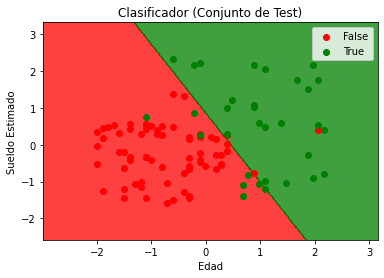

In [56]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = ["False", "True"][i])
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()